<a href="https://colab.research.google.com/github/Hoahot/HoangDucHoa19146185/blob/main/cuoiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ket noi voi drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/final/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

# Tạo bộ dữ liệu test
test=train_datagen.flow_from_directory('/content/drive/MyDrive/final/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

# Các nhãn có trong bộ dữ liệu training set
test.class_indices

Found 133 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


{'thanhlong': 0, 'traikhac': 1}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=test, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
5/5 [==============================] - 68s 12s/step - loss: 6.5655 - accuracy: 0.5639 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 14s 3s/step - loss: 0.7355 - accuracy: 0.6015 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 13s 3s/step - loss: 0.6432 - accuracy: 0.7068 - val_loss: 0.6526 - val_accuracy: 0.7143
Epoch 4/50
5/5 [==============================] - 14s 3s/step - loss: 0.5985 - accuracy: 0.8120 - val_loss: 0.5478 - val_accuracy: 0.6429
Epoch 5/50
5/5 [==============================] - 13s 3s/step - loss: 0.4544 - accuracy: 0.7820 - val_loss: 0.2677 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 14s 3s/step - loss: 0.2858 - accuracy: 0.9248 - val_loss: 0.3285 - val_accuracy: 0.8571
Epoch 7/50
5/5 [==============================] - 14s 3s/step - loss: 0.5121 - accuracy: 0.6992 - val_loss: 0.4759 - val_accuracy: 0.8571
Epoch 8/50
5/5 [=================

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print(Score)

[0.04183224216103554, 0.9924812316894531]


In [ ]:
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.04183224216103554
Train Accuracy 0.9924812316894531


<function matplotlib.pyplot.show>

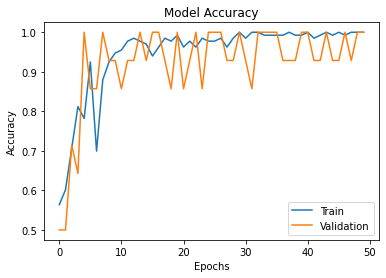

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("/content/drive/MyDrive/final/thanhlong.h5")

In [ ]:
# Tải mô hình 
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/final/thanhlong.h5')

           


In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img=load_img('12.jpg',target_size=(150,150))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img), axis=1)

array([1])

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img=load_img('tl.jpg',target_size=(150,150))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
k = np.argmax(model.predict(img), axis=1)
print(k)

[0]


In [ ]:

a = test.class_indices
X=[]
Y=[]

for num,classes in a.items():
  X.append(num)
  Y.append(classes)

'traikhac'

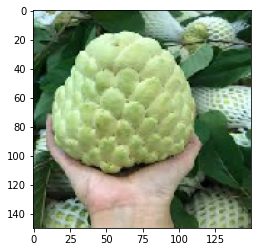

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img=load_img('12.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
int (np.argmax(model.predict(img), axis=1))
k = int (np.argmax(model.predict(img), axis=1))
X[k]



'thanhlong'

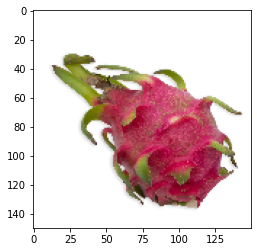

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img=load_img('tl.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
int (np.argmax(model.predict(img), axis=1))
k = int (np.argmax(model.predict(img), axis=1))
X[k]